<a href="https://colab.research.google.com/github/viniciusrpb/116319_estruturasdedados/blob/main/selenastraceae_keras_cnnmodels_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [3]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [4]:
#!ls "/content/drive/My Drive"

!cp -r "/content/drive/My Drive/alga/aug_roi_train" "aug_roi_train"
!cp -r "/content/drive/My Drive/alga/roi_validation" "roi_validation"
!cp -r "/content/drive/My Drive/alga/roi_test" "roi_test"
!cp -r "/content/drive/My Drive/alga/roi_train" "roi_train"

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow_addons as tfa

In [6]:
path_train = 'aug_roi_train'
path_validation = 'roi_validation'
path_test = 'roi_test'

# Pretrained GoogLeNet model using ImageNet


In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3),
                                include_top=False,
                                weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

Hyperparameters

In [22]:
batch_size = 32
epochs=50

### Data augmentation

In [23]:
train_datagen = ImageDataGenerator()

validation_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

Read the images

In [24]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path_train,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( path_validation,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( path_test,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 4340 images belonging to 8 classes.
Found 51 images belonging to 8 classes.
Found 107 images belonging to 8 classes.


Hyper-parameters

In [25]:
number_of_neurons = 1000
number_of_classes = validation_generator.class_indices

Lets see some samples

In [26]:
model = Sequential()

model.add(pre_trained_model)

model.add(Flatten())

model.add(Dense(number_of_neurons))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(8))

model.add(Activation("sigmoid"))

In [27]:
#sgd = SGD(learning_rate=0.1)

f1_score = tfa.metrics.F1Score(num_classes=8, average='macro',threshold=0.5)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy',f1_score])

In [28]:
history_fine = model.fit(train_generator,
                         epochs=epochs,
                         validation_data=validation_generator
                         #initial_epoch=history.epoch[-1],
                         )

Epoch 1/50
136/136 [==============================] - 33s 205ms/step - loss: 1471.2250 - accuracy: 0.2005 - f1_score: 0.2079 - val_loss: 1.9177 - val_accuracy: 0.1569 - val_f1_score: 0.1306
Epoch 2/50
136/136 [==============================] - 26s 191ms/step - loss: 6.2911 - accuracy: 0.2876 - f1_score: 0.1392 - val_loss: 1.8939 - val_accuracy: 0.1961 - val_f1_score: 0.1060
Epoch 3/50
136/136 [==============================] - 26s 190ms/step - loss: 2.8679 - accuracy: 0.2931 - f1_score: 0.1348 - val_loss: 3.8358 - val_accuracy: 0.2157 - val_f1_score: 0.1628
Epoch 4/50
136/136 [==============================] - 26s 190ms/step - loss: 1.7856 - accuracy: 0.2979 - f1_score: 0.1294 - val_loss: 1.9793 - val_accuracy: 0.1569 - val_f1_score: 0.0864
Epoch 5/50
136/136 [==============================] - 26s 190ms/step - loss: 1.8143 - accuracy: 0.2889 - f1_score: 0.1260 - val_loss: 2.0671 - val_accuracy: 0.1961 - val_f1_score: 0.1685
Epoch 6/50
136/136 [==============================] - 26s 190m

Text(0.5, 1.0, 'Training and Validation F1-Score')

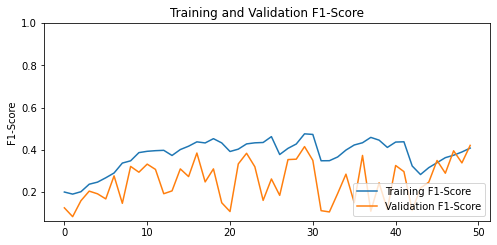

In [15]:
f1 = history_fine.history['f1_score']
val_f1 = history_fine.history['val_f1_score']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Training F1-Score')
plt.plot(val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.ylabel('F1-Score')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation F1-Score')


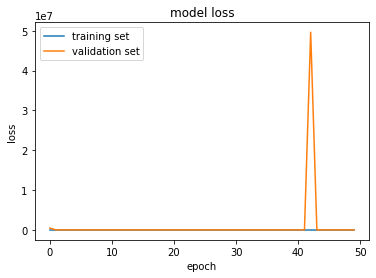

In [16]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [17]:
y_prob = model.predict(test_generator,batch_size=batch_size)
y_pred = np.argmax(y_prob,axis=1)

print(classification_report(test_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      0.11      0.18         9
           2       0.00      0.00      0.00        17
           3       0.14      0.09      0.11        22
           4       0.10      0.23      0.14        13
           5       0.29      0.15      0.20        13
           6       0.08      0.10      0.09        10
           7       0.15      0.29      0.20        14

    accuracy                           0.12       107
   macro avg       0.16      0.12      0.12       107
weighted avg       0.15      0.12      0.11       107



In [18]:
import plotly.figure_factory as ff

y_true = test_generator.classes

z = confusion_matrix(y_true, y_pred)

x = list(test_generator.class_indices.keys())

y = list(test_generator.class_indices.keys())


In [19]:
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()